# LOGISTIC REGRESSION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('insurance_data.csv')
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


PLOTTIG TO UNDERSTAND THE DATA DISTRIBUTION

Text(0, 0.5, 'Bought_insurance')

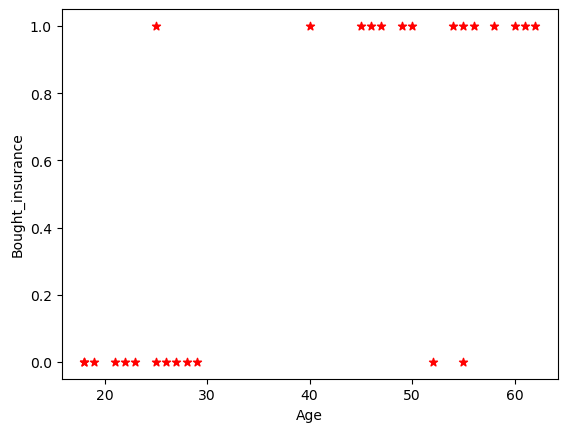

In [7]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='red')
plt.xlabel('Age')
plt.ylabel('Bought_insurance')

In [8]:
df.shape

(27, 2)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size = 0.9)

In [18]:
x_test

,age
22,40
0,22
7,60
18,19
1,25
12,27
4,46
20,21
8,62
13,29


In [19]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

reg.fit(x_train,y_train)

LogisticRegression()

PREDICTING THE MODEL

In [20]:
reg.predict(x_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [22]:
reg.score(x_test,y_test)

0.88

MODELS ACCURACY IS 88%

# EXCERCISE


Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [23]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# EXPLANTORY DATA ANALYSIS

In [24]:
left = df[df.left==1]
left.shape

(3571, 10)

In [25]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [28]:
df.groupby('left').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_15244\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

# Impact of salary on employee retention



<Axes: xlabel='salary'>

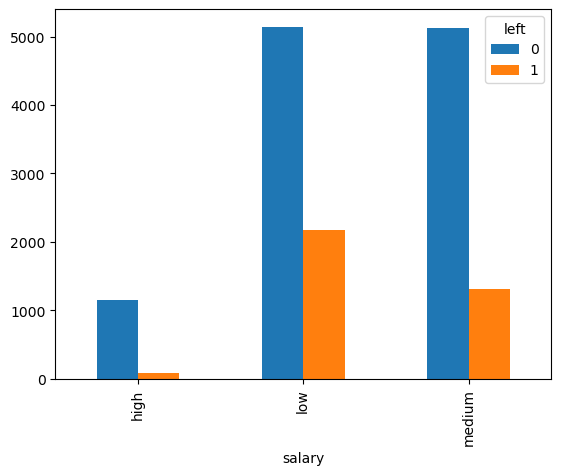

In [29]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


Above bar chart shows employees with high salaries are likely to not leave the company

|

Department wise employee retention rate



<Axes: xlabel='Department'>

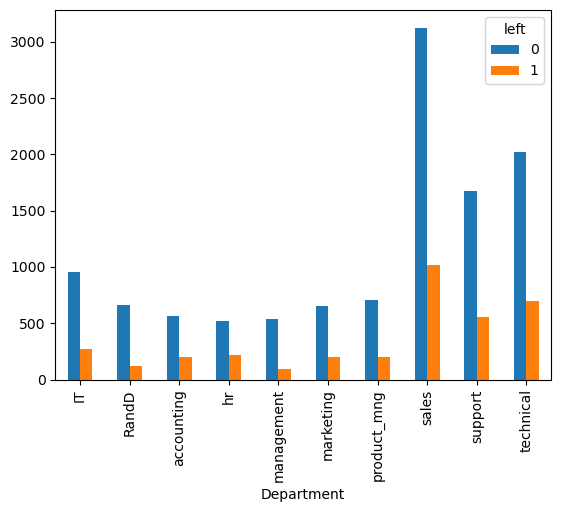

In [30]:
pd.crosstab(df.Department,df.left).plot(kind='bar')


From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

In [31]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [33]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")


In [34]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')


In [35]:
df_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it



In [36]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [37]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [38]:
y = df.left


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Accuracy of the model



In [43]:
model.score(X_test,y_test)


0.7762857142857142